In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


### Let's assume that we work for the bank and we need to decide whether give someone a loan or not. We have a data set with information about age and income of our previous customers. We also have information about whether they were good customers or not (they didn't miss their payments). 

In [2]:
age = [20, 22, 25, 36, 39, 45, 48, 54, 57, 62]
income = [35, 30, 24, 37, 33, 55, 70, 67, 80, 53]
customer_type = ['bad', 'bad', 'bad', 'bad',
                 'bad', 'good', 'good', 'good', 'good', 'good']

### I will put all the data into pandas DataFrame, so it will be easier to work with.

In [3]:
df = pd.DataFrame()
df['age'] = age
df['income'] = income
df['customer'] = customer_type
df.head()

,age,income,customer
0,20,35,bad
1,22,30,bad
2,25,24,bad
3,36,37,bad
4,39,33,bad


## Now, let's plot the data with labeled points, so we can see the division between two classes

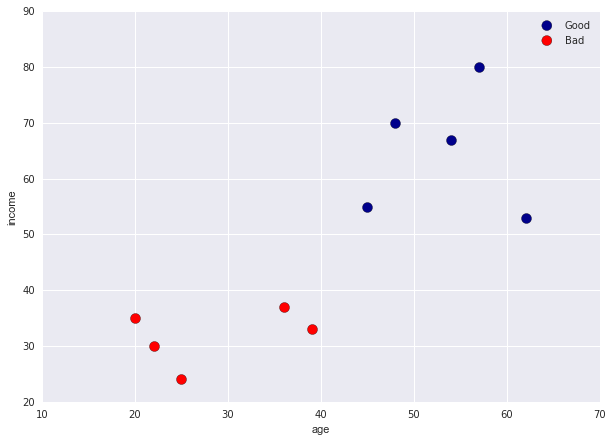

In [30]:
ax = df[df['customer'] == 'good'].plot.scatter(
    x='age', y='income', figsize=(10, 7), color='DarkBlue', label='Good', s=100)
df[df['customer'] == 'bad'].plot.scatter(
    x='age', y='income', color='Red', label='Bad', ax=ax, s=100)

### We have 3 new customers and we need to predict whether they will be good customers.

In [5]:
age_new = [25, 41, 55]
# We have only age and income for new customers, and we need to predict type
income_new = [33, 47, 58]

In [6]:
dfn = pd.DataFrame()
dfn['age'] = age_new
dfn['income'] = income_new

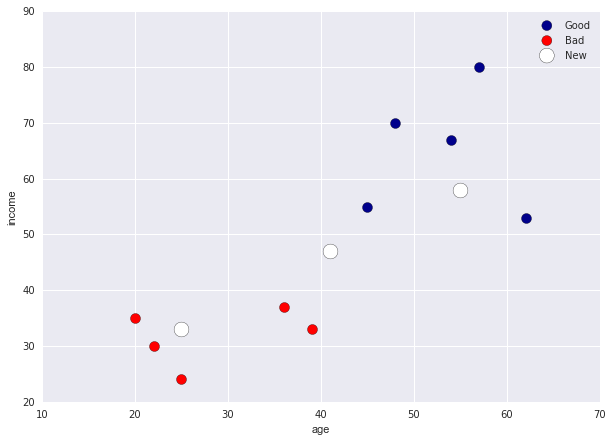

In [86]:
ax = df[df['customer'] == 'good'].plot.scatter(
    x='age', y='income', figsize=(10, 7), color='DarkBlue', label='Good', s=100)
df[df['customer'] == 'bad'].plot.scatter(
    x='age', y='income', color='Red', label='Bad', ax=ax, s=100)
dfn.plot.scatter(x='age', y='income', color='White', label='New', ax=ax, s=220)

### Let's try to classify new data points with k-nearest neighbors algorithm with two different k.

In [35]:
# Importing the classifier from scikit learn
from sklearn.neighbors import KNeighborsClassifier
# Initializing first classifier with number of neighbours = 1
knn1 = KNeighborsClassifier(n_neighbors=1)
# Initializing second classifier with number of neighbours = 3
knn3 = KNeighborsClassifier(n_neighbors=3)

### Let's divide our data into a test set and training set.

In [7]:
X_train = df[['age', 'income']]  # Data that we will be training on
y_train = df['customer']  # Labels of training data
X_test = dfn[['age', 'income']]  # New data points

In [10]:
X_test.head()

,age,income
0,25,33
1,41,47
2,55,58


### Now we fit our data into models that we initialized.

In [42]:
knn1.fit(X_train, y_train)
knn3.fit(X_train, y_train)

### Let our models assign classes to our new customers.

In [43]:
# Predicting class of new customers with k nearest neighbors algoritm with k = 1
result1 = knn1.predict(X_test)
# Predicting class of new customers with k nearest neighbors algoritm with k = 3
result3 = knn3.predict(X_test)
print("With k=1 the new customers will have following classes:", result1)
print("With k=3 the new customers will have following classes:", result3)

With k=1 the new customers will have following classes: ['bad' 'good' 'good']
With k=3 the new customers will have following classes: ['bad' 'bad' 'good']


### Let' check how it will look like.

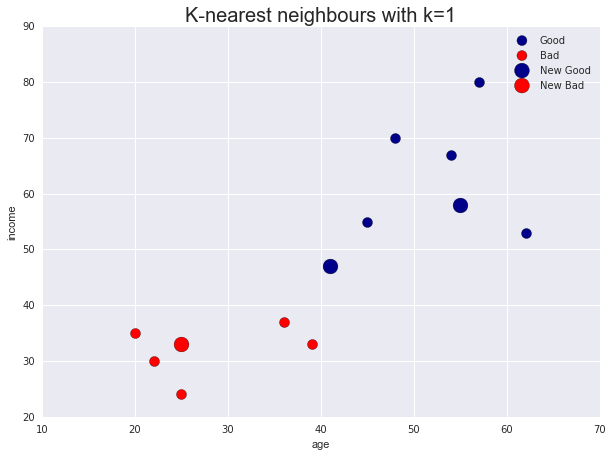

In [69]:
dfn1 = dfn.copy()
dfn1['customer'] = result1
bx = df[df['customer'] == 'good'].plot.scatter(
    x='age', y='income', figsize=(10, 7), color='DarkBlue', label='Good', s=100)
df[df['customer'] == 'bad'].plot.scatter(
    x='age', y='income', color='Red', label='Bad', ax=bx, s=100)
dfn1[dfn1['customer'] == 'good'].plot.scatter(
    x='age', y='income', color='DarkBlue', label='New Good', ax=bx, s=220)
dfn1[dfn1['customer'] == 'bad'].plot.scatter(
    x='age', y='income', color='Red', label='New Bad', ax=bx, s=220)
plt.title("K-nearest neighbours with k=1", fontsize=20)

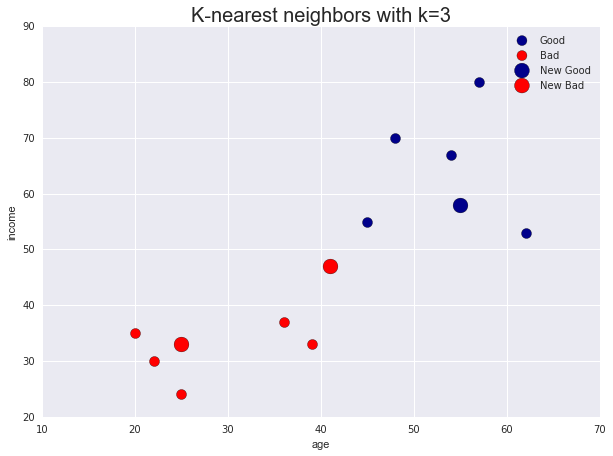

In [68]:
dfn3 = dfn.copy()
dfn3['customer'] = result3
cx = df[df['customer'] == 'good'].plot.scatter(
    x='age', y='income', figsize=(10, 7), color='DarkBlue', label='Good', s=100)
df[df['customer'] == 'bad'].plot.scatter(
    x='age', y='income', color='Red', label='Bad', ax=cx, s=100)
dfn3[dfn3['customer'] == 'good'].plot.scatter(
    x='age', y='income', color='DarkBlue', label='New Good', ax=cx, s=220)
dfn3[dfn3['customer'] == 'bad'].plot.scatter(
    x='age', y='income', color='Red', label='New Bad', ax=cx, s=220)
plt.title("K-nearest neighbors with k=3", fontsize=20)

### As you can see, new customer with age = 41 and income = 47 is assigned class 'good' with k=1 and class 'bad' with k = 3. Choosing the right k is an important task in this algorithm.

# Evaluation

### To choose correct k for k-nearest neighbors we would need some measurement of the correctness of our predictions. Let's assume that we now the right class of new customers and we will try to evaluate how good the algorithm performed with two different k.

In [82]:
correct_classes = ['bad', 'bad', 'good']  # Correct classes for new customers

### We will use classification_report module of scikit-learn that will provide reports of our models performance.

In [83]:
from sklearn.metrics import classification_report  # Importing reporting module
# Module takes in list of correct classes and list of predicted classes
rep1 = classification_report(correct_classes, result1)
rep3 = classification_report(correct_classes, result3)

### Performance of k-nearest neighbors with k = 1:

In [84]:
print(rep1)

             precision    recall  f1-score   support

        bad       1.00      0.50      0.67         2
       good       0.50      1.00      0.67         1

avg / total       0.83      0.67      0.67         3



### Performance of k-nearest neighbors with k = 3:

In [85]:
print(rep3)

             precision    recall  f1-score   support

        bad       1.00      1.00      1.00         2
       good       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         3

